<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/02Classificazione/04SupportVectorMachine/KernelSVM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVM
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

In [2]:
def disegna(X_train_std, Y_train, svm=None):
    # calcolo le dimensioni degli assi in base ai dati
    x_plt = X_train_std[:, 0]
    y_plt = X_train_std[:, 1]
    x_min, x_max = x_plt.min() - 0.2, x_plt.max() + 0.2
    y_min, y_max = y_plt.min() - 0.2, y_plt.max() + 0.2

    # se viene passata la svm, la utilizza per disegnare i contorni delle rette di separazione
    if svm is not None:
        # crea dei punti fittizi riempiendo l'area del piano
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

        # esegue le predizioni di questi punti fittizi
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Set1)

    # disegno il dataset di allenamento
    plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=Y_train, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

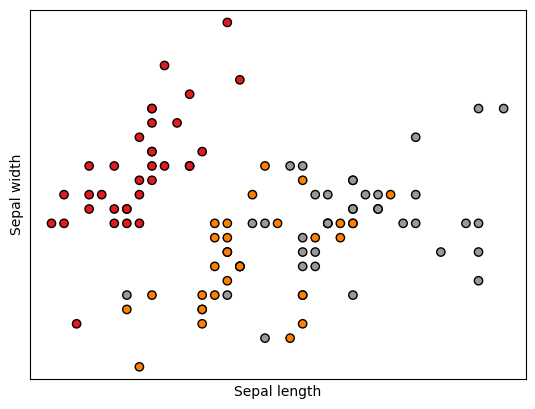

In [3]:
# carico il dataset
iris = load_iris()
# non prendo tutte le feature, ma solo le prime due (così poi posso visualizzarle in un grafico bidimensionale)
X = iris.data[:, :2]
Y = iris.target

# divido in dataset train e test, usando un massimo di esempi per il train e di conseguenza il test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# eseguo la standardizzazione
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# disegno il set di allenamento
disegna(X_train_std, Y_train)

In [4]:
# creo la SVM con kernel lineare e la alleno
svm = SVC(kernel="linear")
svm.fit(X_train_std, Y_train)

# calcolo la accuracy del set di train e di test
print("Kernel lineare su due proprietà")
print("Accuracy Train Set:", svm.score(X_train_std, Y_train))
print("Accuracy Test Set:", svm.score(X_test_std, Y_test))

Kernel lineare su due proprietà
Accuracy Train Set: 0.819047619047619
Accuracy Test Set: 0.8


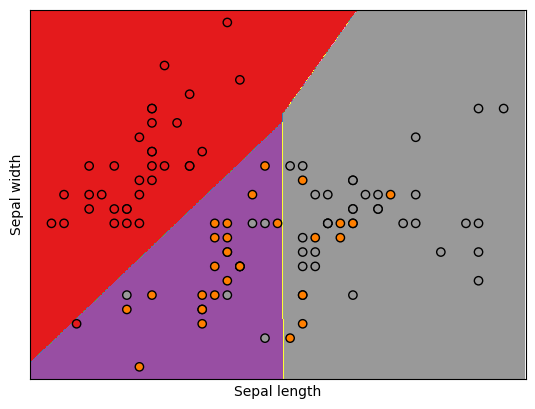

In [5]:
# disegno il set di allenamento con i contorni delle rette di separazione
disegna(X_train_std, Y_train, svm)

In [6]:
# creo la SVM con kernel RBF e la alleno
svm = SVC(kernel="rbf")
svm.fit(X_train_std, Y_train)

# calcolo la accuracy del set di train e di test
print("Kernel Gaussiano su due proprietà")
print("Accuracy Train Set:", svm.score(X_train_std, Y_train))
print("Accuracy Test Set:", svm.score(X_test_std, Y_test))

Kernel Gaussiano su due proprietà
Accuracy Train Set: 0.8095238095238095
Accuracy Test Set: 0.7777777777777778


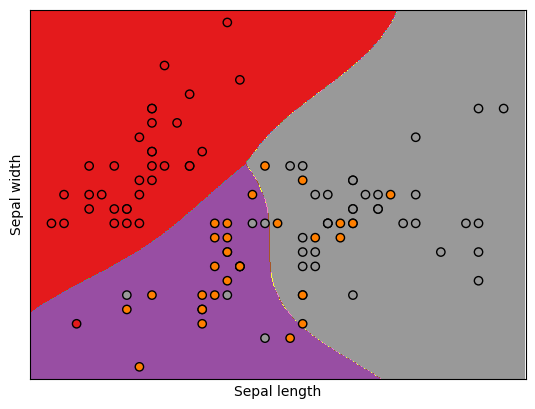

In [7]:
# disegno il set di allenamento con i contorni delle rette di separazione
disegna(X_train_std, Y_train, svm)

In [8]:
# creo la SVM con kernel sigmoidale e la alleno
svm = SVC(kernel="sigmoid")
svm.fit(X_train_std, Y_train)

# calcolo la accuracy del set di train e di test
print("Kernel sigmoidale su due proprietà")
print("Accuracy Train Set:", svm.score(X_train_std, Y_train))
print("Accuracy Test Set:", svm.score(X_test_std, Y_test))

Kernel sigmoidale su due proprietà
Accuracy Train Set: 0.7238095238095238
Accuracy Test Set: 0.8


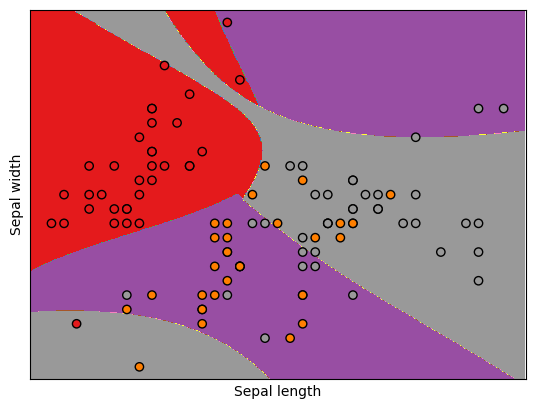

In [9]:
# disegno il set di allenamento con i contorni delle rette di separazione
disegna(X_train_std, Y_train, svm)

In [10]:
# creo la SVM con kernel polinomiale e la alleno
svm = SVC(kernel="poly")
svm.fit(X_train_std, Y_train)

# calcolo la accuracy del set di train e di test
print("Kernel polinomiale su due proprietà")
print("Accuracy Train Set:", svm.score(X_train_std, Y_train))
print("Accuracy Test Set:", svm.score(X_test_std, Y_test))

Kernel polinomiale su due proprietà
Accuracy Train Set: 0.7619047619047619
Accuracy Test Set: 0.6666666666666666


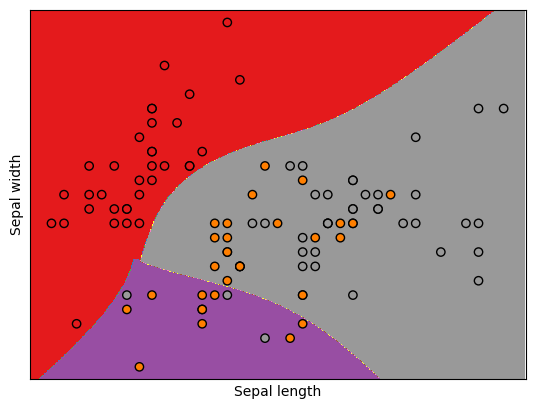

In [11]:
# disegno il set di allenamento con i contorni delle rette di separazione
disegna(X_train_std, Y_train, svm)